## 1. Setup Mario

#### Initializing

Libraries in use
1. openai-gym with the PyPI library: https://pypi.org/project/gym-super-mario-bros/
2. nes-py virtual 


In [33]:
# install gym_super_mario_bros and nes_py
# !pip3 install gym==0.23.1
# !pip3 install nes_py

In [34]:
# import the game
import gym_super_mario_bros

# import the joypad wrapper
from nes_py.wrappers import JoypadSpace
# import simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT



In [35]:
# The different actions which we can take
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [36]:
# Creating the environment / game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT) # wrapping it to only use the simple movements

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3` with the environment ID `SuperMarioBros-v3`.
  logger.warn(


In [37]:
# 7 actions which it can do (SIMPLE_MOVEMENT)
env.action_space

Discrete(7)

In [38]:
# A frame from the game
env.observation_space.shape

(240, 256, 3)

In [39]:
# Random action
SIMPLE_MOVEMENT[env.action_space.sample()]
env.action_space.sample()

1

#### Action loop

In [9]:
# Cretaed a flag which is true
done = True # Restart or not, Right now its not started
# Loop through each of the frames in the game
for step in range(100000):
    if done:
        # start the game
        env.reset()
    # take a step with a random action
    state, reward, done, info  = env.step(env.action_space.sample())
    env.render()
env.close()


2024-01-30 21:05:52.178 Python[4112:99133] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/tl/vykw0m9j78s_832_09rb498w0000gq/T/org.python.python.savedState
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

#### Testing and understanding data

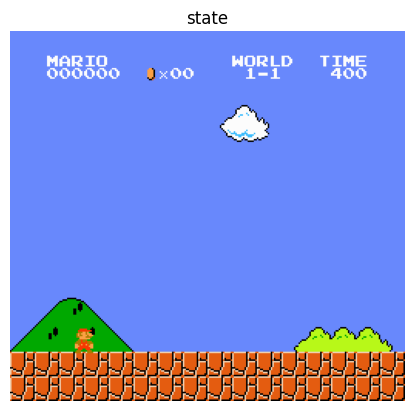

In [41]:
import ml_funcs
state = env.reset()
state.shape # here we get a state
# the state is the current data and situation which the charater is in the game
# for this proj it is the current screen

ml_funcs.view.image(state, 'state')


2.0


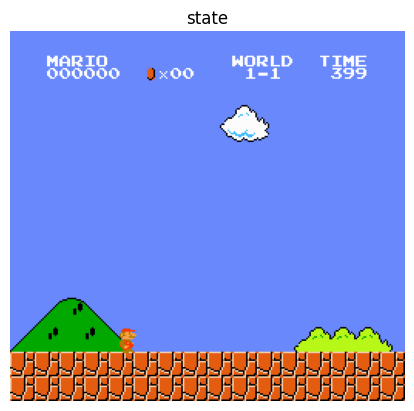

{'coins': 0, 'flag_get': False, 'life': 2, 'score': 0, 'stage': 1, 'status': 'small', 'time': 399, 'world': 1, 'x_pos': 70, 'x_pos_screen': 70, 'y_pos': 79}


In [72]:
# env.step() gives back the state, reward, done and info
state, reward, done, info  = env.step(1)
print(reward)
ml_funcs.view.image(state, 'state')
# the reward function in this case is built by calculating how far mario moves right and how fast he does so without dying
print(info)

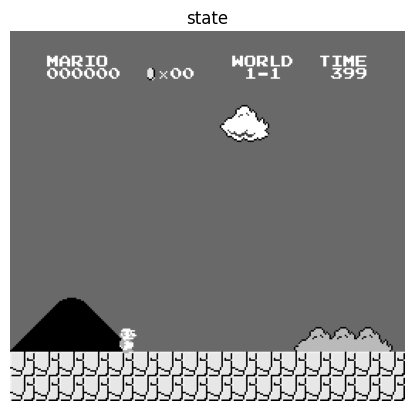

In [79]:
state.shape
state2 = state[:,:,0]
ml_funcs.view.image(state2, 'state')


## 2. Preprocess env

A great ai must have great data

Steps required
- Grayscale because it wont be necessary
- stack the frames to show trajectory

In [ ]:
# Import Fram Stacker Wrapper and GrayScaln Wrapper
from gym.wrappers import FrameStack, GrayScaleObservation

from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

from matplotlib import pyplot as plt

## 3 Train the RL Model

## 4. analyse the results